

МЕТОД ЭЙЛЕРА

Абсолютная ошибка для сетки 0.1: 1.4273936193622552
Абсолютная ошибка с уточнением по Рунге-Ромбергу: 0.5145425615321475




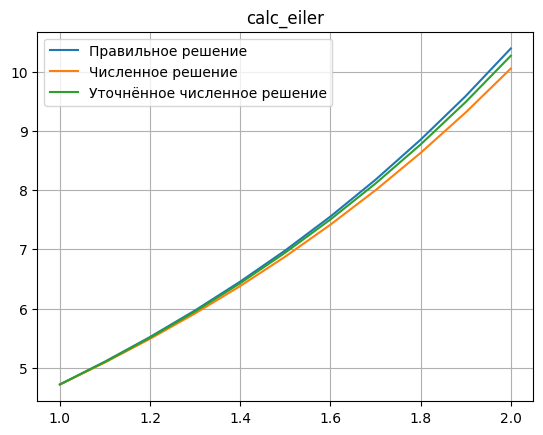



МЕТОД РУНГЕ-КУТТЫ

Абсолютная ошибка для сетки 0.1: 2.375316839575703e-05
Абсолютная ошибка с уточнением по Рунге-Ромбергу: 5.8542275160888835e-06




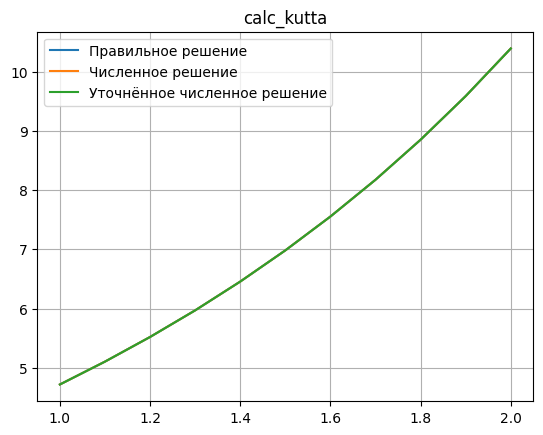



МЕТОД АДАМСА

Абсолютная ошибка для сетки 0.1: 0.6433044149422535
Абсолютная ошибка с уточнением по Рунге-Ромбергу: 0.3417285531837333




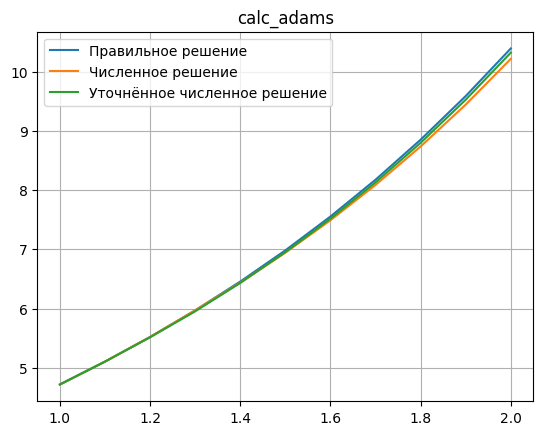

In [1]:
import os
import math
from matplotlib import pyplot as plt

class NUMERIC_KOSHI:
    def __init__(self, x0, x1, corner0, corner1):
        """Параметры: x0, x1, первое условие в x0, второе условие в x0."""
        self.x0 = x0
        self.x1 = x1
        self.corner0 = corner0
        self.corner1 = corner1
    
    def calc_eq(self, x, y, z):
        return (1/x+1)*z - y/x

    def calc_solution(self, x):
        return x + 1 + math.e**x
    
    def plot(self, x_array, integrated, refined, name):
        plt.plot(x_array, [solver.calc_solution(elem) for elem in x_array], label = 'Правильное решение')
        plt.plot(x_array, integrated, label = 'Численное решение')
        plt.plot(x_array, refined, label = 'Уточнённое численное решение')
        plt.title(name)
        plt.legend()
        plt.grid()
        plt.show()
    
    def calc_error(self, x_array, results):
        sum = 0
        
        for i in range (len(results)):
            sum += abs(results[i] - self.calc_solution(x_array[i]))

        return sum
    
    def runge(self, sum1, sum2):
        """Уточнить значение по Рунге-Ромбергу."""
        refined = [sum1[i] + (sum1[i] - sum2[i*2])/((1/2)**2 - 1) for i in range(len(sum1))]
        return refined

    def calc_eiler(self, h) -> list:
        """Рассчитать значения по Эйлеру."""
        
        x_prev = self.x0
        y_prev = self.corner0
        z_prev = self.corner1

        result = [y_prev]

        while (x_prev < self.x1 - h/10):
            y_new = y_prev + h * z_prev
            z_new = z_prev + h * self.calc_eq(x_prev, y_prev, z_prev)

            result.append(y_new)

            z_prev = z_new
            y_prev = y_new
            
            x_prev += h

        return result
    
    def calc_kutta(self, h) -> list:
        """Рассчитать значения по Рунге-Кутте."""
        x_prev = self.x0
        y_prev = self.corner0
        z_prev = self.corner1

        result = [y_prev]
        
        while (x_prev < self.x1 - h/10):
            y1 = h * z_prev
            z1 = h * self.calc_eq(x_prev, y_prev, z_prev)

            y2 = h * (z_prev + 1/2*z1)
            z2 = h * self.calc_eq(x_prev + 1/2*h, y_prev + 1/2*y1, z_prev + 1/2*z1)

            y3 = h * (z_prev + 1/2*z2)
            z3 = h * self.calc_eq(x_prev + 1/2*h, y_prev + 1/2*y2, z_prev + 1/2*z2)

            y4 = h * (z_prev + z3)
            z4 = h * self.calc_eq(x_prev + h, y_prev + y3, z_prev + z3)

            y_new = y_prev + 1/6*(y1 + 2*y2 + 2*y3 + y4)
            z_new = z_prev + 1/6*(z1 + 2*z2 + 2*z3 + z4)

            result.append(y_new)

            z_prev = z_new
            y_prev = y_new
            
            x_prev += h

        return result
    
    def calc_adams(self, h) -> list:
        """Рассчитать значения по методу Адамса."""

        x_array = [self.x0]
        y_array = [self.corner0]
        z_array = [self.corner1]

        while (x_array[-1] <= self.x0 + 3*h):
            y1 = h * z_array[-1]
            z1 = h * self.calc_eq(x_array[-1], y_array[-1], z_array[-1])

            y2 = h * (z_array[-1] + 1/2*z1)
            z2 = h * self.calc_eq(x_array[-1] + 1/2*h, y_array[-1] + 1/2*y1, z_array[-1] + 1/2*z1)

            y3 = h * (z_array[-1] + 1/2*z2)
            z3 = h * self.calc_eq(x_array[-1] + 1/2*h, y_array[-1] + 1/2*y2, z_array[-1] + 1/2*z2)

            y4 = h * (z_array[-1] + z3)
            z4 = h * self.calc_eq(x_array[-1] + h, y_array[-1] + y3, z_array[-1] + z3)

            y_new = y_array[-1] + 1/6*(y1 + 2*y2 + 2*y3 + y4)
            z_new = z_array[-1] + 1/6*(z1 + 2*z2 + 2*z3 + z4)

            x_array.append(x_array[-1]+h)
            y_array.append(y_new)
            z_array.append(z_new)

        while (x_array[-1] < self.x1 - h/10):
            z_new = z_array[-1] + h/24*(55*self.calc_eq(x_array[-1], y_array[-1], z_array[-1])
                - 59*self.calc_eq(x_array[-2], y_array[-2], z_array[-2])
                + 37*self.calc_eq(x_array[-3], y_array[-3], z_array[-3])
                - 9*self.calc_eq(x_array[-4], y_array[-4], z_array[-4]))
            
            y_new = y_array[-1] + h/24*(55*z_array[-1] - 59*z_array[-1]
                + 37*z_array[-1] - 9*z_array[-1])
            
            x_array.append(x_array[-1]+h)
            y_array.append(y_new)
            z_array.append(z_new)
        
        return y_array
    
    def wrapper(self, h, method):
        """Обернуть метод для выполнения общего набора действий."""
        sum1 = method(h)
        sum2 = method(h/2)
        refined = self.runge(sum1, sum2)
        x_array = [self.x0 + h*i for i in range(int((self.x1-self.x0)/h)+1)]
        
        print(f"Абсолютная ошибка для сетки {h}: {self.calc_error(x_array, sum1)}")
        print(f"Абсолютная ошибка с уточнением по Рунге-Ромбергу: {self.calc_error(x_array, refined)}\n\n")

        self.plot(x_array, sum1, refined, method.__name__)

    def wrapper_wrapper(self, h):
        """Вызвать все методы."""
        print("\n\nМЕТОД ЭЙЛЕРА\n")
        self.wrapper(h, self.calc_eiler)
        print("\n\nМЕТОД РУНГЕ-КУТТЫ\n")
        self.wrapper(h, self.calc_kutta)
        print("\n\nМЕТОД АДАМСА\n")
        self.wrapper(h, self.calc_adams)

if __name__ == "__main__":
    solver = NUMERIC_KOSHI(1, 2, 2 + math.e, 1 + math.e)

    solver.wrapper_wrapper(0.1)